In [19]:
 %matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from importlib import reload
import numpy as np 
import pandas as pd
import os
import autodepgraph as adg
from autodepgraph import  AutoDepGraph_DAG

In [8]:
cal_True_delayed=  'autodepgraph.node_functions.calibration_functions.test_calibration_True_delayed'
test_graph = AutoDepGraph_DAG('test graph')

for node in ['A', 'B', 'C', 'D', 'E']:
    test_graph.add_node(node, 
                        calibrate_function=cal_True_delayed)

In [9]:
 test_graph.add_edge('C', 'A')
test_graph.add_edge('C', 'B')
test_graph.add_edge('B', 'A')
test_graph.add_edge('D', 'A')
test_graph.add_edge('E', 'D')

In [10]:
# The default plotting mode is SVG 
test_graph.cfg_plot_mode = 'svg'
# Updates the monitor, in this case the svg/html page
test_graph.update_monitor()

# Updating the monitor overwrites an svg file whose location is determined by the attribute:
test_graph.cfg_svg_filename

'/Users/adriaanrol/GitHubRepos/Personal/AutoDepGraph/autodepgraph/svg_viewer/adg_graph.svg'

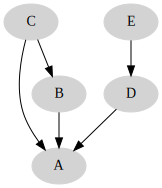

In [11]:
from IPython.display import display, SVG
display(SVG(test_graph.cfg_svg_filename))

## Metrics required

In [48]:
import pandas as pd
report_spec = pd.DataFrame(data=[
                   ['T1', np.NaN, 's', '$\mu$, $\sigma$, and max over several hours'],
                   ['T2-echo', np.NaN, 's', '$\mu$, $\sigma$, and max over several hours'],
                  ['T2-Ramsey', np.NaN, 's', '$\mu$, $\sigma$, and max over several hours'],    
                 ['f01-frequency', np.NaN, 'Hz', 'at sweetspot'],
                 ['f02-frequency', np.NaN, 'Hz', 'at sweetspot'],
                 ['anharmonicity', np.NaN, 'Hz', 'at sweetspot'],              
                 ['EC', np.NaN, 'Hz', None],
                 ['EJ', np.NaN, 'Hz', None],
                 ['res-frequency bare', np.NaN, 'Hz', 'at sweetspot'],
                 ['res-frequency', np.NaN, 'Hz', 'at sweetspot'],  
                 ['res-Qc', np.NaN, 'Hz', 'at sweetspot'],
                 ['res-Qi', np.NaN, 'Hz', 'at sweetspot'],
                 ['chi', np.NaN, 'Hz', 'dispersive shift resonator and qubit'],
                 ['DC-flux-per-Phi0', np.NaN, 'A/Phi0'],                   
                  ], columns=['Variable', 'Value', 'unit', 'comments'])


In [56]:
report_spec

,Variable,Value,unit,comments
0,T1,NaN,s,"$\mu$, $\sigma$, and max over several hours"
1,T2-echo,NaN,s,"$\mu$, $\sigma$, and max over several hours"
2,T2-Ramsey,NaN,s,"$\mu$, $\sigma$, and max over several hours"
3,f01-frequency,NaN,Hz,at sweetspot
4,f02-frequency,NaN,Hz,at sweetspot
5,anharmonicity,NaN,Hz,at sweetspot
6,EC,NaN,Hz,None
7,EJ,NaN,Hz,None
8,res-frequency bare,NaN,Hz,at sweetspot
9,res-frequency,NaN,Hz,at sweetspot


In [87]:
cal_True_delayed=  'autodepgraph.node_functions.calibration_functions.test_calibration_True_delayed'
single_q_char = AutoDepGraph_DAG('Single qubit characterization')

for node in ['coherence over time',
             'coherence', 
             'AllXY',
             'frequency-fine',
             'Motzoi',
             'Rabi',
             'three-tone spectroscopy',
             'frequency vs flux', 
             'coherence vs flux',
             'frequency at sweetspot', 
             'mixer offset drive',
             'mixer skewness drive',
             'resonator vs flux',
             'spectroscopy power',
             'frequency coarse',
             'resonator frequency', 
             'resonator power', 
             'resonator bare frequency', 
             'mixer offset readout drive',
             'mixer skewness readout drive',]:
    single_q_char.add_node(node, 
                        calibrate_function=cal_True_delayed)

single_q_char.add_edge('coherence over time', 'coherence')
single_q_char.add_edge('coherence', 'AllXY')
single_q_char.add_edge('AllXY', 'Motzoi')
single_q_char.add_edge('Motzoi', 'frequency-fine')
single_q_char.add_edge('frequency-fine', 'Rabi')
single_q_char.add_edge('Rabi', 'mixer offset drive')
single_q_char.add_edge('Rabi', 'mixer skewness drive')

single_q_char.add_edge('coherence vs flux', 'coherence')
single_q_char.add_edge('coherence vs flux', 'frequency vs flux')

single_q_char.add_edge('Rabi', 'frequency at sweetspot')
single_q_char.add_edge('frequency vs flux', 'frequency at sweetspot')
single_q_char.add_edge('three-tone spectroscopy', 'frequency at sweetspot')
single_q_char.add_edge('frequency at sweetspot', 'frequency coarse')
single_q_char.add_edge('frequency at sweetspot', 'spectroscopy power')

single_q_char.add_edge('spectroscopy power', 'resonator vs flux')

single_q_char.add_edge('frequency coarse', 'resonator vs flux')

single_q_char.add_edge('resonator vs flux', 'resonator frequency')
single_q_char.add_edge('resonator frequency', 'resonator power')
single_q_char.add_edge('resonator power', 'resonator bare frequency')
single_q_char.add_edge('resonator bare frequency', 'mixer offset readout drive')
single_q_char.add_edge('resonator bare frequency', 'mixer skewness readout drive')



In [89]:
single_q_char.cfg_svg_filename

'/Users/adriaanrol/GitHubRepos/Personal/AutoDepGraph/autodepgraph/svg_viewer/adg_graph.svg'

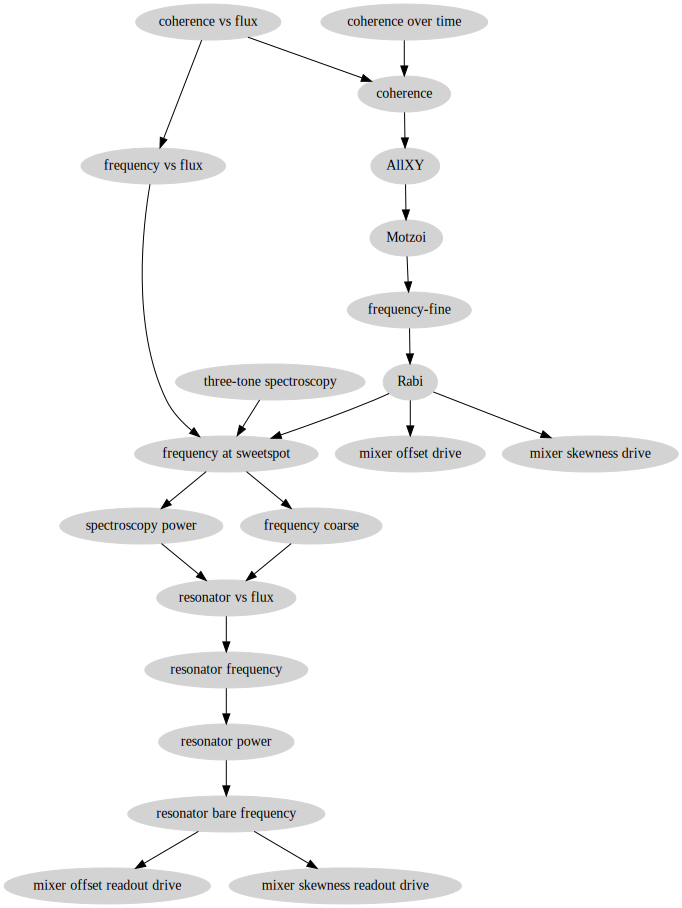

In [88]:
single_q_char.update_monitor()
from IPython.display import display, SVG
display(SVG(single_q_char.cfg_svg_filename))